In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
data = pd.read_csv(r"C:\Users\radon\Desktop\data science projects\data\Telco_Cusomer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


gender  churn  count
Female  No     2549     1
        Yes    939      1
Male    No     2625     1
        Yes    930      1
Name: count, dtype: int64


Text(0.5, 1.0, 'gender cancelation')

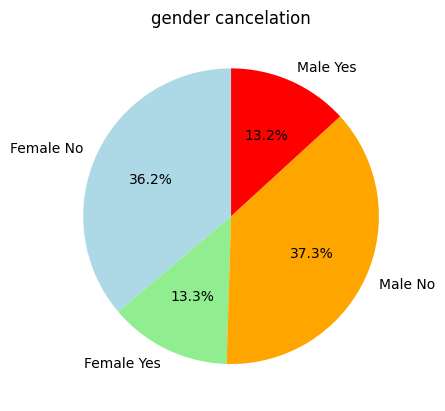

In [137]:
churn = data.groupby("gender").Churn.value_counts()
churn = churn.reset_index()
churn.columns = ["gender", "churn", "count"]
print(churn.value_counts())
plt.pie(churn["count"], labels = churn["gender"] + " " + churn["churn"], autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightgreen", "orange", "red"])
plt.title("gender cancelation")

SeniorCitizen      churn  count
Not SeniorCitizen  No     4508     1
                   Yes    1393     1
SeniorCitizen      No     666      1
                   Yes    476      1
Name: count, dtype: int64


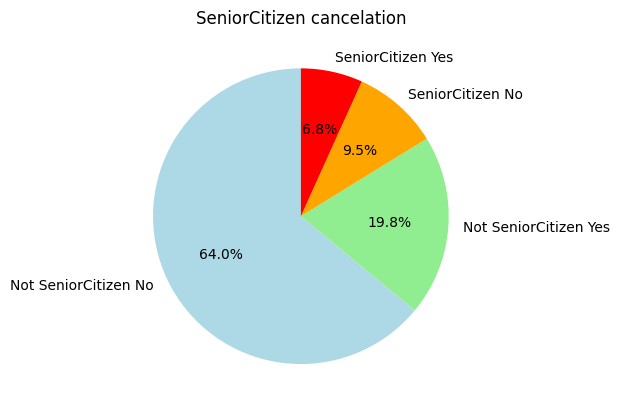

In [138]:
data.SeniorCitizen = data.SeniorCitizen.replace({1: "SeniorCitizen", 0: "Not SeniorCitizen"})
churn = data.groupby("SeniorCitizen").Churn.value_counts()
churn = churn.reset_index()
churn.columns = ["SeniorCitizen", "churn", "count"]
print(churn.value_counts())
plt.pie(churn["count"], labels=churn["SeniorCitizen"] + " " + churn["churn"], autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightgreen", "orange", "red"])
plt.title("SeniorCitizen cancelation")
plt.show()

In [139]:
for col in data.columns:
    print(data[f"{col}"].name, data[f"{col}"].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen ['Not SeniorCitizen' 'SeniorCitizen']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
overall_chance = data.Churn.value_counts(normalize=True)["Yes"] * 100
print(f"Overall chance of customer to cancel: {overall_chance:.2f}%")

male_chance = data[data.gender == "Male"].Churn.value_counts(normalize=True)["Yes"] *100
female_chance = data[data.gender == "Female"].Churn.value_counts(normalize=True)["Yes"] *100
print(f"\nChance of Male cuustomer to cancel: {male_chance:.2f}%"
      f"\nChance of female cuustomer to cancel: {female_chance:.2f}%")

SeniorCitizen_chance =  data[data.SeniorCitizen == "SeniorCitizen"].Churn.value_counts(normalize=True)["Yes"] * 100
NonSeniorCitizen_chance = data[data.SeniorCitizen == "Not SeniorCitizen"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of SeniorCitizen to cancel: {SeniorCitizen_chance:.2f}%"
      f"\nChance of NonSeniorCitizen to cancel: {NonSeniorCitizen_chance:.2f}%")

Partner_chance = data[data.Partner == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoPartner_chance = data[data.Partner == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of Partner to cancel: {Partner_chance:.2f}%"
      f"\nChance of NoPartner to cancel: {NoPartner_chance:.2f}%")

Dependents_change = data[data.Dependents == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoDependents_change = data[data.Dependents == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of Dependents to cancel: {Dependents_change:.2f}%"
      f"\nChance of NoDependents to cancel: {NoDependents_change:.2f}%")

PhoneService_chance = data[data.PhoneService == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoPhoneService_chance = data[data.PhoneService == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of PhoneService to cancel: {PhoneService_chance:.2f}%"
      f"\nChance of NoPhoneService to cancel: {NoPhoneService_chance:.2f}%")

MultipleLines_chance = data[data.MultipleLines == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoMultipleLines_chance = data[data.MultipleLines == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NoPhoneService_chance = data[data.MultipleLines == "No phone service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of MultipleLines to cancel: {MultipleLines_chance:.2f}%"
      f"\nChance of NoMultipleLines to cancel: {NoMultipleLines_chance:.2f}%"
      f"\nChance of NoPhoneService to cancel: {NoPhoneService_chance:.2f}%")

DSLinternetService_chance = data[data.InternetService == "DSL"].Churn.value_counts(normalize=True)["Yes"] * 100
Fiberoptic_internetService_chance = data[data.InternetService == "Fiber optic"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.InternetService == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of DLSinternetService to cancel: {DSLinternetService_chance:.2f}%"
      f"\nChance of Fiberoptic_internetService to cancel: {Fiberoptic_internetService_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

OnlineSecurity_chance = data[data.OnlineSecurity == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoOnlineSecurity_chance = data[data.OnlineSecurity == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.OnlineSecurity == "No internet service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of OnlineSecurity to cancel: {OnlineSecurity_chance:.2f}%"
      f"\nChance of NoOnlineSecurity to cancel: {NoOnlineSecurity_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

OnlineBackup_chance = data[data.OnlineBackup == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoOnlineBackup_chance = data[data.OnlineBackup == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.OnlineBackup == "No internet service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of OnlineBackup to cancel: {OnlineBackup_chance:.2f}%"
      f"\nChance of NoOnlineBackup to cancel: {NoOnlineBackup_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

DeviceProtection_chance = data[data.DeviceProtection == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoDeviceProtection_chance = data[data.DeviceProtection == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.DeviceProtection == "No internet service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of DeviceProtection to cancel: {DeviceProtection_chance:.2f}%"
      f"\nChance of NoDeviceProtection to cancel: {NoDeviceProtection_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

techSupport_chance = data[data.TechSupport == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoTechSupport_chance = data[data.TechSupport == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.TechSupport == "No internet service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of techSupport to cancel: {techSupport_chance:.2f}%"
      f"\nChance of NoTechSupport to cancel: {NoTechSupport_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

StreamingTV_chance = data[data.StreamingTV == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoStreamingTV_chance = data[data.StreamingTV == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.StreamingTV == "No internet service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of StreamingTV to cancel: {StreamingTV_chance:.2f}%"
      f"\nChance of NoStreamingTV to cancel: {NoStreamingTV_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

StreamingMovies_chance = data[data.StreamingMovies == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoStreamingMovies_chance = data[data.StreamingMovies == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
NointernetService_chance = data[data.StreamingMovies == "No internet service"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of StreamingMovies to cancel: {StreamingMovies_chance:.2f}%"
      f"\nChance of NoStreamingMovies to cancel: {NoStreamingMovies_chance:.2f}%"
      f"\nChance of NointernetService to cancel: {NointernetService_chance:.2f}%")

month_to_month_contract_chance = data[data.Contract == "Month-to-month"].Churn.value_counts(normalize=True)["Yes"] * 100
OneYearContract_chance = data[data.Contract == "One year"].Churn.value_counts(normalize=True)["Yes"] * 100
TwoYearContract_chance = data[data.Contract == "Two year"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of month to month Contract to cancel: {month_to_month_contract_chance:.2f}%"
      f"\nChance of OneYearContract to cancel: {OneYearContract_chance:.2f}%"
      f"\nChance of TwoYearContract to cancel: {TwoYearContract_chance:.2f}%")

PaperlessBilling_chance = data[data.PaperlessBilling == "Yes"].Churn.value_counts(normalize=True)["Yes"] * 100
NoPaperlessBilling_chance = data[data.PaperlessBilling == "No"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of PaperlessBilling to cancel: {PaperlessBilling_chance:.2f}%"
      f"\nChance of NoPaperlessBilling to cancel: {NoPaperlessBilling_chance:.2f}%")

ElectronicCheck_chance = data[data.PaymentMethod == "Electronic check"].Churn.value_counts(normalize=True)["Yes"] * 100
MailedCheck_chance = data[data.PaymentMethod == "Mailed check"].Churn.value_counts(normalize=True)["Yes"] * 100
BankTransfer_chance = data[data.PaymentMethod == "Bank transfer (automatic)"].Churn.value_counts(normalize=True)["Yes"] * 100
CreditCard_chance = data[data.PaymentMethod == "Credit card (automatic)"].Churn.value_counts(normalize=True)["Yes"] * 100
print(f"\nChance of ElectronicCheck to cancel: {ElectronicCheck_chance:.2f}%"
      f"\nChance of MailedCheck to cancel: {MailedCheck_chance:.2f}%"
      f"\nChance of BankTransfer to cancel: {BankTransfer_chance:.2f}%"
      f"\nChance of CreditCard to cancel: {CreditCard_chance:.2f}%")


Overall chance of customer to cancel: 26.54%
Chance of Male cuustomer to cancel: 26.16%
Chance of female cuustomer to cancel: 26.92%

Chance of SeniorCitizen to cancel: 41.68%
Chance of NonSeniorCitizen to cancel: 23.61%

Chance of Partner to cancel: 19.66%
Chance of NoPartner to cancel: 32.96%

Chance of Dependents to cancel: 15.45%
Chance of NoDependents to cancel: 31.28%

Chance of PhoneService to cancel: 26.71%
Chance of NoPhoneService to cancel: 24.93%

Chance of MultipleLines to cancel: 28.61%
Chance of NoMultipleLines to cancel: 25.04%
Chance of NoPhoneService to cancel: 24.93%

Chance of DLSinternetService to cancel: 18.96%
Chance of Fiberoptic_internetService to cancel: 41.89%
Chance of NointernetService to cancel: 7.40%

Chance of OnlineSecurity to cancel: 14.61%
Chance of NoOnlineSecurity to cancel: 41.77%
Chance of NointernetService to cancel: 7.40%

Chance of OnlineBackup to cancel: 21.53%
Chance of NoOnlineBackup to cancel: 39.93%
Chance of NointernetService to cancel: 7.

In [161]:
highest_risk_customer = []
high = data.groupby("gender").Churn.value_counts(normalize=True) * 100
high = high.reset_index()
high = high[high["Churn"] == "Yes"]
print(high)
'''for col in data.columns:
    high = data[f"{col}"].Churn.vlaue_counts(normalize=True)'''


   gender Churn  proportion
1  Female   Yes   26.920872
3    Male   Yes   26.160338


'for col in data.columns:\n    high = data[f"{col}"].Churn.vlaue_counts(normalize=True)'